<a href="https://colab.research.google.com/github/tharina11/Deep-Learning-Exercises/blob/main/What_is_convolution%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Convolution**

To combine two numerical entities we can add or multiply as simple approaches. Convolution is another method of combining two entities. Convolution is commonly found in image processing, probability , and in multiplying polynomials.

A couple of tutorials are refferred to understand convolution and from Digital Sreeni and 3Blue1Brown youtube channels. Links to the those videos are cited at the end of the code.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# Numpy convolution function
np.convolve([1, 2, 3], [4, 5, 6])

array([ 4, 13, 28, 27, 18])

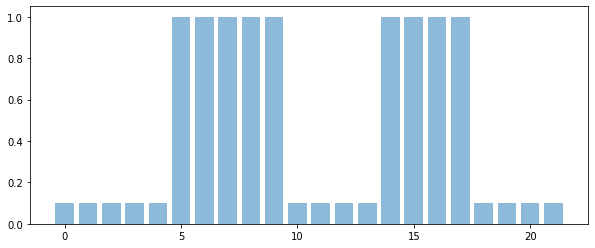

In [3]:
# Generate two arrays
x = [0.1,0.1,0.1,0.1,0.1,1, 1, 1, 1, 1, 0.1,0.1,0.1,0.1, 1, 1, 1, 1, 0.1,0.1,0.1,0.1]
y = np.arange(len(x))
figure(figsize=(10, 4))
plt.bar(y, x, align='center', alpha=0.5)
plt.show()

Convolution slides the second vector over the first vector and gets the dot product at each instance. In pure math definition, the second array always gets reversed before the getting dot product.

In [4]:
# A filter to use with the array above for convolution
conv_filter = [0.2,0.2,0.2,0.2,0.2]

# Get the dot product 
x_conv = np.convolve(x, conv_filter)
x_conv

array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.28, 0.46, 0.64, 0.82, 1.  , 0.82,
       0.64, 0.46, 0.28, 0.28, 0.46, 0.64, 0.82, 0.82, 0.64, 0.46, 0.28,
       0.08, 0.06, 0.04, 0.02])

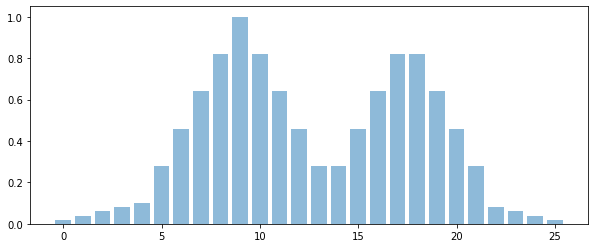

In [5]:
# Plot the convolution result
figure(figsize=(10, 4))
y = np.arange(len(x_conv))
plt.bar(y, x_conv, align='center', alpha=0.5)
plt.show()

Convolution has returned a smoothed out version of the original data. Depending on the values in the filter, the shape of the convoluted output differs. Let's use a different filter and see what happens.

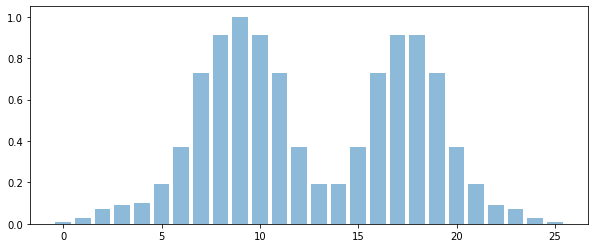

In [6]:
conv_filter1 = [0.1,0.2,0.4,0.2,0.1]

# Get the dot product 
x_conv = np.convolve(x, conv_filter1)
x_conv

figure(figsize=(10, 4))
y = np.arange(len(x_conv))
plt.bar(y, x_conv, align='center', alpha=0.5)
plt.show()

The output is smoothed compared to the previous convolution output.

Let's explore convolution with an image downloaded from [Unsplash](https://unsplash.com/photos/ozMroXStJ2w). We will use Python cv2 library to import convolition function.

In [7]:
# Import libraries to work with the image
from skimage import io, img_as_float
import cv2
from google.colab.patches import cv2_imshow

In [8]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [9]:
#Import input image
image = io.imread('/content/drive/MyDrive/Machine Learning Concepts/Data/Strawberries.jpg')

In [10]:
# Shape of the image
image.shape

(427, 640, 3)

The input is a 3 band image. The bands are red, green, and blue.

In [11]:
# resize the image to view clearly
dim = (300, 300)
resized = cv2.resize(image, dim)

In [32]:
# Shape of the resized image
resized.shape

(300, 300, 3)

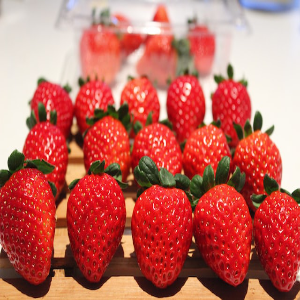

In [12]:
# View the image in true color
cv2_imshow(resized[:,:,::-1])

Let's create multiple kernels to apply convolution to the input images and explore the outputs. Each pixel of the output image layers will be the dot product value between kernal and the window of pixels selected at each instance along each layer.

In [13]:
# Create a kernel of 5 * 5 matrix of 1s
kernel = np.ones((5,5), np.float32)/25

In [14]:
# 2D convolution of image with the kernel
conv_using_cv2 = cv2.filter2D(resized, -1, kernel, borderType=cv2.BORDER_CONSTANT)

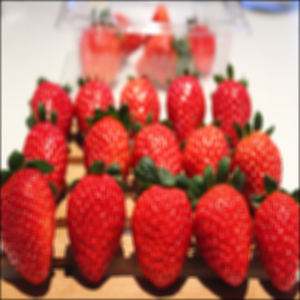

In [15]:
# View convolution output
cv2_imshow(conv_using_cv2[:,:,::-1])

In [31]:
# Shape of the convolution output
conv_using_cv2.shape

(300, 300, 3)

Because the filter pixels consist of value 1,the output image got average values of each window of the image. consequently, the image got blurred. 

Let's apply more filters and observe what information that we can extract from the input image.

In [16]:
# Gaussian filter
gaussian_kernel = np.array([[1/16, 1/8, 1/16],
                            [1/8, 1/4, 1/8],
                            [1/16, 1/8, 1/16]])

In [17]:
conv_gaussian = cv2.filter2D(resized, -1, gaussian_kernel, borderType=cv2.BORDER_CONSTANT)

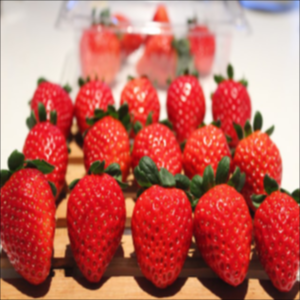

In [18]:
cv2_imshow(conv_gaussian[:,:,::-1])

Image is slightly blurred and bounderies are less prominent. We can still see the strawberries clearly, but we do not see significantly meaningful information.

In [20]:
vertical_kernel = np.array([[0.25, 0.00, -0.25],
                            [0.50, 0.00, -0.50],
                            [0.25, 0.00, -0.25]])


In [21]:
conv_vertical = cv2.filter2D(resized, -1, vertical_kernel, borderType=cv2.BORDER_CONSTANT)

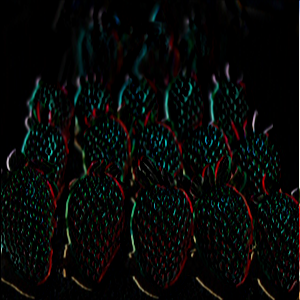

In [22]:
cv2_imshow(conv_vertical:,:,::-1])

When the filter is in areas of same color, the dot product becomes zero because the sum of the values of our the filter applied is zero. This detects the vertical edges of the images because it detects areas when you move from left to right.

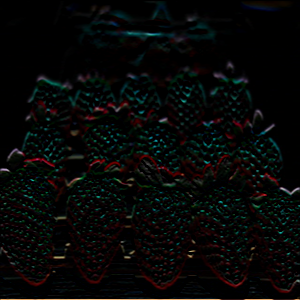

In [23]:
horizontal_kernel = np.array([[0.25, 0.50, 0.25],
                              [0.00, 0.00, 0.00],
                              [-0.25, -0.50, -0.25]])

conv_horizontal = cv2.filter2D(resized, -1, horizontal_kernel, borderType=cv2.BORDER_CONSTANT)
cv2_imshow(conv_horizontal[:,:,::-1])

The kernel detected horizontal boundaries this time, and the vertical boundaries are not detected.

Also, image can be sharpened using kernels.

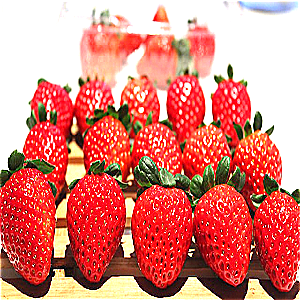

In [24]:
# kernel to Sharpen the image
sharpening_kernel = np.array([[0.00, 0.00, -0.2, 0.00, 0.00],
                              [0.00, -0.2, -0.5, -0.2, 0.00],
                              [-0.2, -0.5, 5.00, -0.5, -0.2],
                              [0.00, -0.2, -0.5, -0.2, 0.00],
                              [0.00, 0.00, -0.2, 0.00, 0.00]
                              ])

conv_sharpening = cv2.filter2D(resized, -1, sharpening_kernel, borderType=cv2.BORDER_CONSTANT)
cv2_imshow(conv_sharpening[:,:,::-1])

Until this point, kernels used are suggested in the tutorials. I came up with the next kernels based on the knowledge obtained from tutorials.

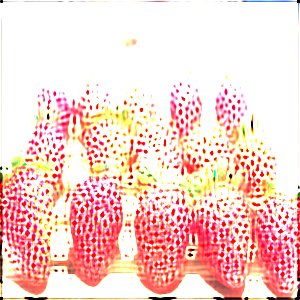

In [25]:
# Kernel to highlight circular objects
circular_kernel = np.array([[0.5, 0.5, 0.5, 0.00, 0.5, 0.5, 0.5],
                            [0.5, 0.5, 0.00, -0.5, 0.00, 0.5, 0.5],
                            [0.5, 0.00, -0.5, -0.5, -0.5, 0.00, 0.5],
                            [0.00, -0.5, -0.5, -0.5, -0.5, -0.5, 0.00],
                            [0.5, 0.00, -0.5, -0.5, -0.5, 0.00, 0.5],
                            [0.5, 0.5, 0.00, -0.5, 0.00, 0.5, 0.5],
                            [0.5, 0.5, 0.5, 0.00, 0.5, 0.5, 0.5]
                            ])

conv_circular = cv2.filter2D(resized, -1, circular_kernel, borderType=cv2.BORDER_CONSTANT)
cv2_imshow(conv_circular[:,:,::-1])

In the above convolution output, some areas with uniform colors in the circular objects are present. Let's make the sum of positive and negative values of the filter 0, so the ares with uniflrm colors will go to zero (will appear in black). This will highlight the boundaries.

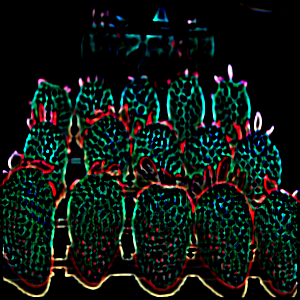

In [26]:
# New circular kernel
circular_kernel = np.array([[0.25, 0.25, 0.25, 0.00, 0.25, 0.25, 0.25],
                            [0.25, 0.25, 0.00, -0.5, 0.00, 0.25, 0.25],
                            [0.25, 0.00, -0.5, -0.5, -0.5, 0.00, 0.25],
                            [0.00, -0.5, -0.5, -0.5, -0.5, -0.5, 0.00],
                            [0.25, 0.00, -0.5, -0.5, -0.5, 0.00, 0.25],
                            [0.25, 0.25, 0.00, -0.5, 0.00, 0.25, 0.25],
                            [0.25, 0.25, 0.25, 0.00, 0.25, 0.25, 0.25]
                            ])

conv_circular = cv2.filter2D(resized, -1, circular_kernel, borderType=cv2.BORDER_CONSTANT)
cv2_imshow(conv_circular[:,:,::-1])

Now we can see the circular edges clearly. Great!

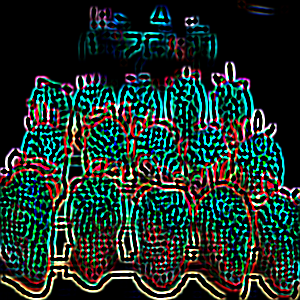

In [27]:
# Apply circular kernel again 
circular_kernel = np.array([[0.25, 0.25, 0.25, 0.00, 0.25, 0.25, 0.25],
                            [0.25, 0.25, 0.00, -0.5, 0.00, 0.25, 0.25],
                            [0.25, 0.00, -0.5, -0.5, -0.5, 0.00, 0.25],
                            [0.00, -0.5, -0.5, -0.5, -0.5, -0.5, 0.00],
                            [0.25, 0.00, -0.5, -0.5, -0.5, 0.00, 0.25],
                            [0.25, 0.25, 0.00, -0.5, 0.00, 0.25, 0.25],
                            [0.25, 0.25, 0.25, 0.00, 0.25, 0.25, 0.25]
                            ])

conv_circular1 = cv2.filter2D(conv_circular, -1, circular_kernel, borderType=cv2.BORDER_CONSTANT)
cv2_imshow(conv_circular1[:,:,::-1])

I applied the circular kernel on the convolution output of the previous output, now we can see the boundaries are more prominent (feel like I similar to what happen in a deep convolutional neural networks!).

Following this idea, I applied a simple kernel used previously, to highlight vertical boundaries. The ideas is to get rid of the horizontal lines we see in the above convolution output.

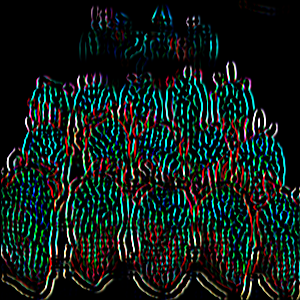

In [28]:
# Vertical kernel
vertical_kernel = np.array([[0.25, 0.00, -0.25],
                            [0.50, 0.00, -0.50],
                            [0.25, 0.00, -0.25]])

conv_circular2 = cv2.filter2D(conv_circular1, -1, vertical_kernel, borderType=cv2.BORDER_CONSTANT)
cv2_imshow(conv_circular2[:,:,::-1])

It worked. Now I do not see the horizontal boundaries, but the circular boundries are still there.

Next, we will use a very small kernel to identify circular boundaries to see what happens.

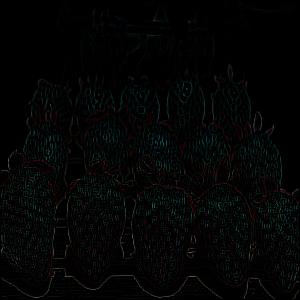

In [29]:
# Small circular kernel
small_circular_kernel = np.array([[0.25, 0.00, 0.25],
                            [0.00, -1.00, 0.00],
                            [0.25, 0.00, 0.25]
                            ])

small_conv_circular = cv2.filter2D(resized, -1, small_circular_kernel, borderType=cv2.BORDER_CONSTANT)
cv2_imshow(small_conv_circular[:,:,::-1])

This highlights the circular boundaries as with previous kernels, but the boundaries are veru thin. Even the find boundaries of achenes on the strawberry can be seen. Cool!

Convolution always creates bigger arrays than we started with, assuming the length of all arrays are larger than one. Therefore, somethimes you need to truncate the output.

Convolution requires a much higher amount of computation compared to normal calculations like multiplication and addition. 

#### **Reference**

- [But what is a convolution?](https://www.youtube.com/watch?v=KuXjwB4LzSA&t=115s&ab_channel=3Blue1Brown)

- [What is digital image filtering and image convolution?](https://www.youtube.com/watch?v=1GUgD2SBl9A&ab_channel=DigitalSreeni)

- [Unsplash](https://unsplash.com/photos/ozMroXStJ2w)